# Imports

In [1]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=b6bf6345543a5998e6e018ceec2f4285490f8c231a1b547d00cd172d1b5f675e
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=c091139e317eabf0880baae7d81a345656c07593e8923eaee7b0759a6e60533d
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


# Libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working with files
import os
import glob
import io


# Working with OpenML dataset
import openml
from openml.datasets import edit_dataset, fork_dataset, get_dataset


# Performance Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


# Functions

# Data

In [3]:
# Download dataset based on OpenML dataset ID

# Name = Crimes-in-Los-angeles-from-2010
# ID = 43579
# URL = https://www.openml.org/search?type=data&sort=runs&status=active&id=43579

dataset = openml.datasets.get_dataset(43579)

# Print a summary
print(
        f"This is dataset '{dataset.name}', the target feature is "
        f"'{dataset.default_target_attribute}'"
     )

print(f"URL: {dataset.url}")
print(dataset.description[:500])

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


This is dataset 'Crimes-in-Los-angeles-from-2010', the target feature is 'None'
URL: https://api.openml.org/data/v1/download/22102404/Crimes-in-Los-angeles-from-2010.arff
This dataset reflects incidents of crime in the City of Los Angeles dating back to 2010. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0, 0). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database.
This data was taken from data.gov(https://catalog.data.gov/dataset


In [4]:
# Get the actual data (pandas dataframe and uninteresting metadata)

big_df, *_ = dataset.get_data()
print(f"The lenght of the '{dataset.name}' is = {len(big_df)}")
print(f"The number of features for the '{dataset.name}' is = {len(big_df.columns)}")
# big_df.head()

The lenght of the 'Crimes-in-Los-angeles-from-2010' is = 1692056
The number of features for the 'Crimes-in-Los-angeles-from-2010' is = 26


# Preprocessing

In [5]:
# Convert 'date_reported' and 'date_occurred' to a datetime object
big_df['Date_Reported_format'] = pd.to_datetime(big_df['Date_Reported'], format = '%m/%d/%Y')
big_df['Date_Occurred_format'] = pd.to_datetime(big_df['Date_Occurred'], format = '%m/%d/%Y')

# Filter the DataFrame to include only years from 2010 to 2017
start_year = 2010
end_year = 2017

big_df = big_df[(big_df['Date_Reported_format'].dt.year >= start_year) & (big_df['Date_Reported_format'].dt.year <= end_year)]

# big_df

In [6]:
## Drop Columns

columns_to_drop = ['DR_Number', 'Date_Reported', 'Date_Occurred', 'Area_ID', 'Crime_Code', 'MO_Codes',
                   'Crime_Code_1', 'Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Address', 'Cross_Street',
                   'Premise_Code', 'Weapon_Used_Code', 'Status_Code']

big_df = big_df.drop(columns = columns_to_drop)
big_df.head()

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format
0,1800,77th Street,1241,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11
1,2300,Olympic,2071,VEHICLE - STOLEN,NaN,None,None,STREET,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22
2,2030,Southeast,1823,VEHICLE - STOLEN,12.0,None,None,STREET,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18
3,1800,Southeast,1803,VEHICLE - STOLEN,NaN,None,None,STREET,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10
4,2300,Topanga,2133,VANDALISM - MISDEAMEANOR (399 OR UNDER),84.0,M,W,SINGLE FAMILY DWELLING,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04


In [7]:
# Checking for each column the type and the number of distinct and similar values (also see if there are missing values)

for col in big_df.columns:
    print(col)
    print(big_df[col].value_counts())
    print(f"Number of missing values = {big_df[col].isna().sum()}")
    print(f"Type of dataframe column = {big_df[col].dtypes}")
    print('\n')

Time_Occurred
1200    92210
1800    49343
2000    46068
1900    43865
2200    43390
        ...  
644         6
634         6
626         5
659         4
431         1
Name: Time_Occurred, Length: 1438, dtype: int64
Number of missing values = 0
Type of dataframe column = int64


Area_Name
77th Street    115629
Southwest      107090
N Hollywood     90227
Pacific         87660
Southeast       87384
Mission         83696
Northeast       79891
Van Nuys        79163
Newton          78013
Devonshire      77427
Topanga         76892
Hollywood       76000
Harbor          73878
Olympic         73760
Central         71084
West Valley     70873
Rampart         70078
West LA         69338
Wilshire        66941
Foothill        63629
Hollenbeck      60426
Name: Area_Name, dtype: int64
Number of missing values = 0
Type of dataframe column = object


Reporting_District
363     8643
645     8148
646     7064
2156    7020
636     6747
        ... 
798        1
988        1
922        1
1053       1
708 

## Mapping Columns, Lowercasing Values

In [8]:
# Transforming certain variebles to a more readable form

mapped_gender = {'F': 'Female', 'M': 'Male', 'X': 'Unknown', 'H': 'Unknown', '-': 'Unknown' }
mapped_descents = {'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino',
                           'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native',
                           'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander',
                           'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown',
                           'Z': 'Asian Indian'}


big_df['Victim_Sex'] = big_df['Victim_Sex'].replace(mapped_gender)
big_df['Victim_Descent'] = big_df['Victim_Descent'].replace(mapped_descents)
big_df['Victim_Age'] = big_df['Victim_Age'].fillna(0).astype(int)


## Lowercasing values from columns with descriptions
big_df['Crime_Code_Description'] = big_df['Crime_Code_Description'].str.lower()
big_df['Premise_Description'] = big_df['Premise_Description'].str.lower()
big_df['Weapon_Description'] = big_df['Weapon_Description'].str.lower()

print(len(big_df))
big_df.head()

1659079


,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format
0,1800,77th Street,1241,intimate partner - simple assault,30,Female,White,"multi-unit dwelling (apartment, duplex, etc)","strong-arm (hands, fist, feet or bodily force)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11
1,2300,Olympic,2071,vehicle - stolen,0,None,None,street,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22
2,2030,Southeast,1823,vehicle - stolen,12,None,None,street,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18
3,1800,Southeast,1803,vehicle - stolen,0,None,None,street,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10
4,2300,Topanga,2133,vandalism - misdeameanor (399 or under),84,Male,White,single family dwelling,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04


## Missing Values

* TBD what to do with missing values for location => a lot of (0, 0) values - should be considered?

### Crime Code Description

* Missing values for Crime Code Description are None

In [9]:
crime_list = list(set(big_df['Crime_Code_Description']))
mapped_crimes = {crime: idx if crime is not None else -1 for idx, crime in enumerate(crime_list)}
mapped_crimes

{'brandish weapon': 0,
 'theft plain - petty (950  under)': 1,
 'theft, person': 2,
 'throwing object at moving vehicle': 3,
 'drugs, to a minor': 4,
 'theft-grand (950.01  over)excpt,guns,fowl,livestk,prod0036': 5,
 'embezzlement, petty theft (950  under)': 6,
 'criminal homicide': 7,
 'theft of identity': 8,
 'weapons possession/bombing': 9,
 'pimping': 10,
 'illegal dumping': 11,
 'shots fired at inhabited dwelling': 12,
 None: -1,
 'bomb scare': 14,
 'contributing': 15,
 'rape, forcible': 16,
 'shoplifting - petty theft (950  under)': 17,
 'till tap - attempt': 18,
 'theft, coin machine - attempt': 19,
 'dishonest employee - grand theft': 20,
 'blocking door induction center': 21,
 'vehicle - attempt stolen': 22,
 'failure to disperse': 23,
 'letters, lewd': 24,
 'theft, coin machine - grand (950.01  over)': 25,
 'trespassing': 26,
 'violation of restraining order': 27,
 'drunk roll': 28,
 'document worthless (200  under)': 29,
 'arson': 30,
 'child neglect (see 300 w.i.c.)': 31,
 

In [10]:
# Get the year from the date
big_df['Year'] = pd.to_datetime(big_df['Date_Occurred_format']).dt.year

big_df['Crime_Code_Description'] = big_df['Crime_Code_Description'].replace(mapped_crimes).fillna(-1).astype(int)

# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Crime_Code_Description'] != -1]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Crime_Code_Description'].median().reset_index(name = 'Median_Crime')

# Assign the median value / year to the missing values for each year
big_df['Crime_Code_Description'] = np.where(big_df['Crime_Code_Description'] == -1,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Crime']),
                                big_df['Crime_Code_Description']).astype(int)

print(big_df['Crime_Code_Description'].value_counts())
big_df.head()

60     152518
114    127383
42     127290
50     119808
1      118668
        ...  
21          3
18          3
102         1
40          1
141         1
Name: Crime_Code_Description, Length: 142, dtype: int64


,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year
0,1800,77th Street,1241,88,30,Female,White,"multi-unit dwelling (apartment, duplex, etc)","strong-arm (hands, fist, feet or bodily force)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013
1,2300,Olympic,2071,42,0,None,None,street,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010
2,2030,Southeast,1823,42,12,None,None,street,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013
3,1800,Southeast,1803,42,0,None,None,street,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010
4,2300,Topanga,2133,61,84,Male,White,single family dwelling,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014


In [11]:
# Skewness and Outliers - before grouping
print(big_df['Crime_Code_Description'].skew())
print(big_df['Crime_Code_Description'].describe())


# Skewness and Outliers - after grouping

res = big_df['Crime_Code_Description'].value_counts()

# Get top 10 most used
top_10_indices = res.index[:15]

# Create a dictionary mapping indices
result_dict = {index: index for index in top_10_indices}
common_value = -1  # value for the remaining indeces
result_dict.update({index: common_value for index in res.index if index not in top_10_indices})


big_df['Crime_Code_Description'] = [result_dict[x] for x in big_df['Crime_Code_Description']]
big_df['Crime_Code_Description'].value_counts()

0.08173100474381693
count    1.659079e+06
mean     6.220514e+01
std      4.098319e+01
min      0.000000e+00
25%      3.300000e+01
50%      6.000000e+01
75%      9.600000e+01
max      1.420000e+02
Name: Crime_Code_Description, dtype: float64


-1      314596
 60     152518
 114    127383
 42     127290
 50     119808
 1      118668
 8      104411
 88      89794
 118     83629
 61      74300
 89      71097
 124     67336
 122     66449
 5       58675
 48      46279
 17      36846
Name: Crime_Code_Description, dtype: int64

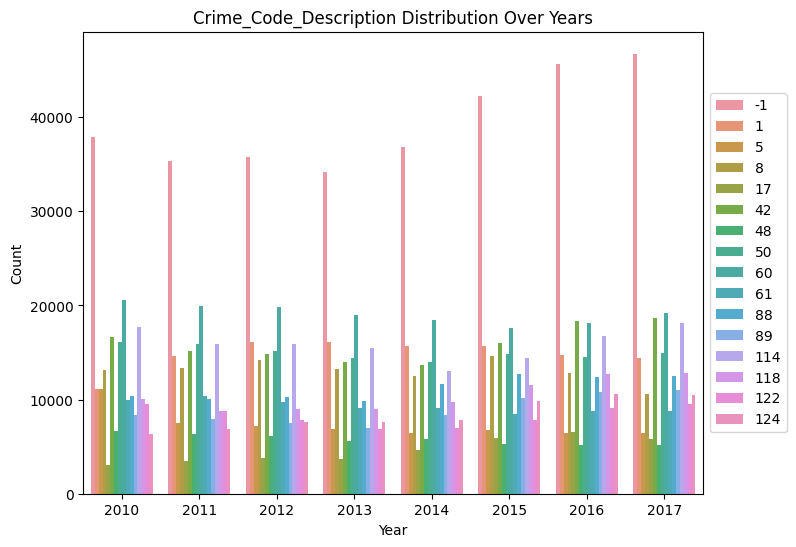

In [12]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Crime_Code_Description', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Crime_Code_Description Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Age

* The values = '0' are unknown values
* Should be grouped into preset buckets
* Missing values are treated before mapping the buckets and according to the mediam value for each year

In [13]:
# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Victim_Age'] != 0]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Victim_Age'].median().reset_index(name = 'Median_Age')

# Assign the median value / year to the missing values for each year
big_df['Victim_Age'] = np.where(big_df['Victim_Age'] == 0,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Age']),
                                big_df['Victim_Age']).astype(int)

# Create age bins and remove the original age column
age_bins = [0, 18, 25, 40, 60, 120]
age_labels = ['0-17', '18-24', '25-39', '40-59', '60+']
big_df['Victim_Age_Buckets'] = pd.cut(big_df['Victim_Age'], bins = age_bins, labels = age_labels, right = False)
big_df = big_df.drop(['Victim_Age'], axis = 1)

# big_df['Victim_Age'].value_counts() # check if there are still missing values
big_df.head()

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,Female,White,"multi-unit dwelling (apartment, duplex, etc)","strong-arm (hands, fist, feet or bodily force)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,None,None,street,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,None,None,street,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,None,None,street,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,Male,White,single family dwelling,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014,60+


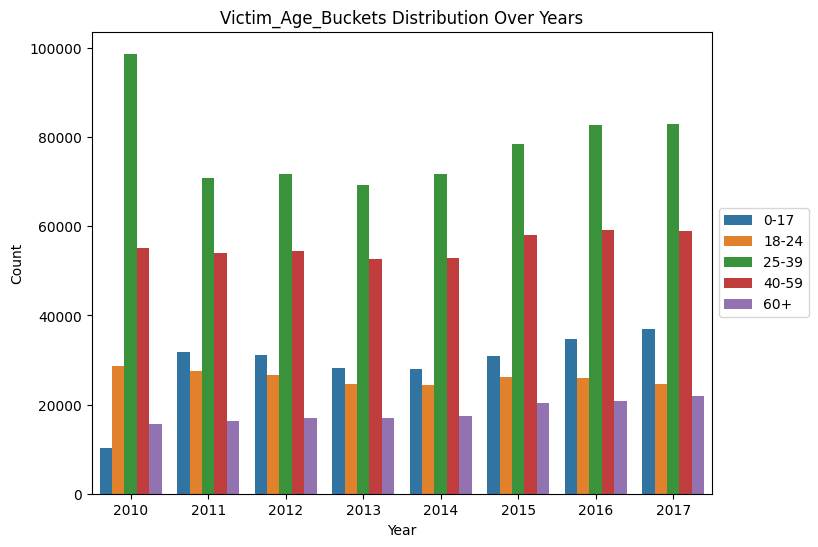

In [14]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Victim_Age_Buckets', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Victim_Age_Buckets Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Gender

* Missing values for Gender are Unknown and None
* One hot encoding for gender values:

    * Female = 0
    * Male = 1

In [15]:
# One hot encoding for gender
mapped_gender = {'Female': 0, 'Male': 1, 'Unknown': 2, 'None': 2, None: 2 }

big_df['Victim_Sex'] = big_df['Victim_Sex'].replace(mapped_gender).fillna(2).astype(int)

# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Victim_Sex'] != 2]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Victim_Sex'].median().reset_index(name = 'Median_Sex')

# Assign the median value / year to the missing values for each year
big_df['Victim_Sex'] = np.where(big_df['Victim_Sex'] == 2,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Sex']),
                                big_df['Victim_Sex']).astype(int)


# big_df['Victim_Sex'].value_counts()
big_df.head()

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,0,White,"multi-unit dwelling (apartment, duplex, etc)","strong-arm (hands, fist, feet or bodily force)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,1,None,street,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,1,None,street,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,1,None,street,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,1,White,single family dwelling,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014,60+


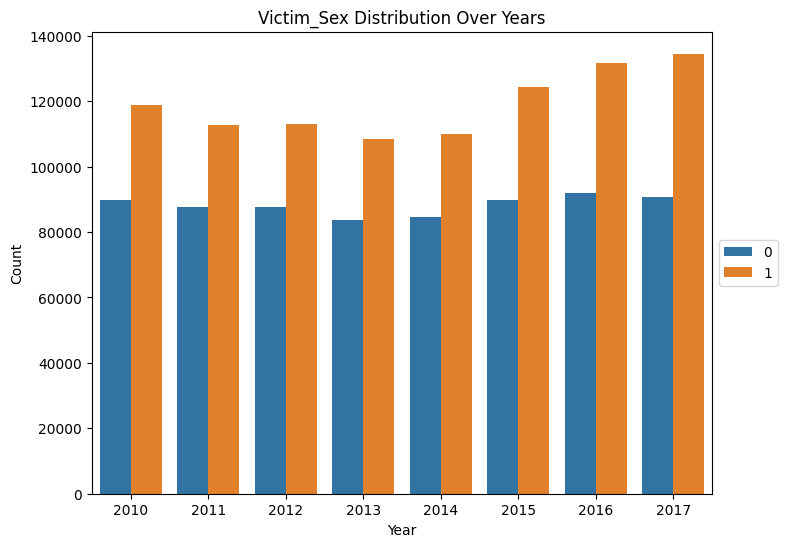

In [16]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Victim_Sex', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Victim_Sex Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Descent

* Missing values for descent are Unknown, None and -
* Mapping of values for descent values:

    * mapped_descent = {
                    'Hispanic/Latin/Mexican': 0,
                    'White': 1,
                    'Black': 2,
                    'Other': 3,
                    'Unknown': -1,
                    'Other Asian': 4,
                    'Korean': 5,
                    'Filipino': 6,
                    'American Indian/Alaskan Native': 7,
                    'Chinese': 8,
                    'Pacific Islander': 9,
                    'Japanese': 10,
                    'Hawaiian': 11,
                    'Vietnamese': 12,
                    'Guamanian': 13,
                    'Asian Indian': 14,
                    'Samoan': 15,
                    'Cambodian': 16,
                    'Laotian': 17,
                    '-': -1,
                    None: -1
                        }

In [17]:
# One hot encoding for gender
mapped_descent = {
                    'Hispanic/Latin/Mexican': 0,
                    'White': 1,
                    'Black': 2,
                    'Other': 3,
                    'Unknown': -1,
                    'Other Asian': 4,
                    'Korean': 5,
                    'Filipino': 6,
                    'American Indian/Alaskan Native': 7,
                    'Chinese': 8,
                    'Pacific Islander': 9,
                    'Japanese': 10,
                    'Hawaiian': 11,
                    'Vietnamese': 12,
                    'Guamanian': 13,
                    'Asian Indian': 14,
                    'Samoan': 15,
                    'Cambodian': 16,
                    'Laotian': 17,
                    '-': -1,
                    None: -1
}

big_df['Victim_Descent'] = big_df['Victim_Descent'].replace(mapped_descent).fillna(-1).astype(int)

# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Victim_Descent'] != -1]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Victim_Descent'].median().reset_index(name = 'Median_Descent')

# Assign the median value / year to the missing values for each year
big_df['Victim_Descent'] = np.where(big_df['Victim_Descent'] == -1,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Descent']),
                                big_df['Victim_Descent']).astype(int)


print(big_df['Victim_Descent'].value_counts())
big_df.head()

1     607078
0     574870
2     266221
3     160194
4      39017
5       7453
6       1958
7        700
8        640
9        285
10       246
11       151
12        91
13        68
14        56
15        26
16        15
17        10
Name: Victim_Descent, dtype: int64


,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,0,1,"multi-unit dwelling (apartment, duplex, etc)","strong-arm (hands, fist, feet or bodily force)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,1,1,street,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,1,1,street,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,1,1,street,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,1,1,single family dwelling,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014,60+


In [18]:
# Skewness and Outliers - before grouping

print("Skewness and Outliers - before grouping")
print(big_df['Victim_Descent'].skew())
print(big_df['Victim_Descent'].describe())


# Skewness and Outliers - after grouping

purpose_categories = {
                    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, # important
                    7: 7, 8: 7, 9: 7, 10: 7, 11: 7, 12: 7, 13: 7, 14: 7, 15: 7, 16: 7, 17: 7 # less important
                    }


big_df['Victim_Descent'] = [purpose_categories[x] for x in big_df['Victim_Descent']]
big_df['Victim_Descent'].value_counts()

print("\nSkewness and Outliers - after grouping")
print(big_df['Victim_Descent'].skew())
print(big_df['Victim_Descent'].describe())

Skewness and Outliers - before grouping
1.406984248686917
count    1.659079e+06
mean     1.112333e+00
std      1.133443e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.700000e+01
Name: Victim_Descent, dtype: float64

Skewness and Outliers - after grouping
1.1125761264096201
count    1.659079e+06
mean     1.109772e+00
std      1.115267e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.000000e+00
Name: Victim_Descent, dtype: float64


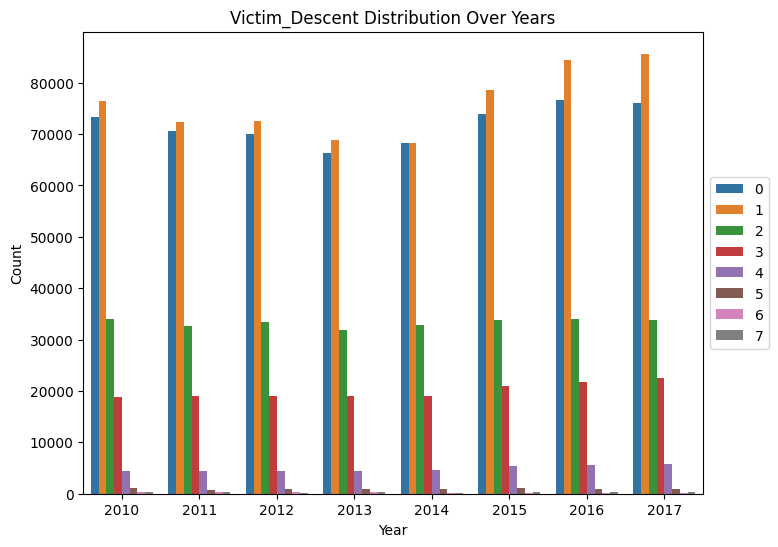

In [19]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Victim_Descent', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Victim_Descent Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Premise Description

* Missing values for Premise Description are None

In [20]:
crime_list = list(set(big_df['Premise_Description']))
mapped_premises = {crime: idx if crime is not None else -1 for idx, crime in enumerate(crime_list)}
mapped_premises

{'metrolink train': 0,
 'furniture store': 1,
 'mta - blue line - san pedro': 2,
 'bank drop box/money drop-outside of bank*': 3,
 'record-cd music/computer game store': 4,
 'other rr train (union pac, sante fe etc': 5,
 'beauty supply store': 6,
 'frat house/sorority/dormitory': 7,
 'health spa/gym': 8,
 'beauty/barber shop': 9,
 'veterinarian/animal hospital': 10,
 'swap meet': 11,
 'pedestrian overcrossing': 12,
 'mta - gold line - highland park': 13,
 'day care/children*': 14,
 'other residence': 15,
 'apartment/condo common laundry room': 16,
 'mta - expo line - expo park/usc': 17,
 'blue line (above ground surface train)': 18,
 'drive thru*': 19,
 'terminal': 20,
 'website': 21,
 'single family dwelling': 22,
 'hotel': 23,
 'the beverly connection': 24,
 'valet': 25,
 'clothing store': 26,
 'equipment rental': 27,
 'river bed*': 28,
 'public restroom/outside*': 29,
 'amusement park*': 30,
 'mta - expo line - expo/western': 31,
 'sidewalk': 32,
 'underpass/bridge*': 33,
 'parking 

In [21]:
# One hot encoding for gender
big_df['Premise_Description'] = big_df['Premise_Description'].replace(mapped_premises).fillna(-1).astype(int)

# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Premise_Description'] != -1]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Premise_Description'].median().reset_index(name = 'Median_Premise')

# Assign the median value / year to the missing values for each year
big_df['Premise_Description'] = np.where(big_df['Premise_Description'] == -1,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Premise']),
                                big_df['Premise_Description']).astype(int)

print(big_df['Premise_Description'].value_counts())
big_df.head()

81     372844
22     342192
189    213479
34     118093
32      82901
        ...  
265         1
120         1
43          1
209         1
134         1
Name: Premise_Description, Length: 298, dtype: int64


,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,0,1,189,"strong-arm (hands, fist, feet or bodily force)",Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,1,1,81,None,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,1,1,81,None,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,1,1,81,None,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,1,1,22,None,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014,60+


In [22]:
# Skewness and Outliers - before grouping
print(big_df['Premise_Description'].skew())
print(big_df['Premise_Description'].describe())


# Skewness and Outliers - after grouping

res = big_df['Premise_Description'].value_counts()

# Get top 10 most used
top_10_indices = res.index[:10]

# Create a dictionary mapping indices
result_dict = {index: index for index in top_10_indices}
common_value = -1  # value for the remaining indeces
result_dict.update({index: common_value for index in res.index if index not in top_10_indices})


big_df['Premise_Description'] = [result_dict[x] for x in big_df['Premise_Description']]
big_df['Premise_Description'].value_counts()

0.6234721258481574
count    1.659079e+06
mean     1.078380e+02
std      8.356475e+01
min      0.000000e+00
25%      3.200000e+01
50%      8.100000e+01
75%      1.890000e+02
max      2.980000e+02
Name: Premise_Description, dtype: float64


 81     372844
 22     342192
-1      305165
 189    213479
 34     118093
 32      82901
 259     74255
 249     63253
 113     34019
 177     29616
 275     23262
Name: Premise_Description, dtype: int64

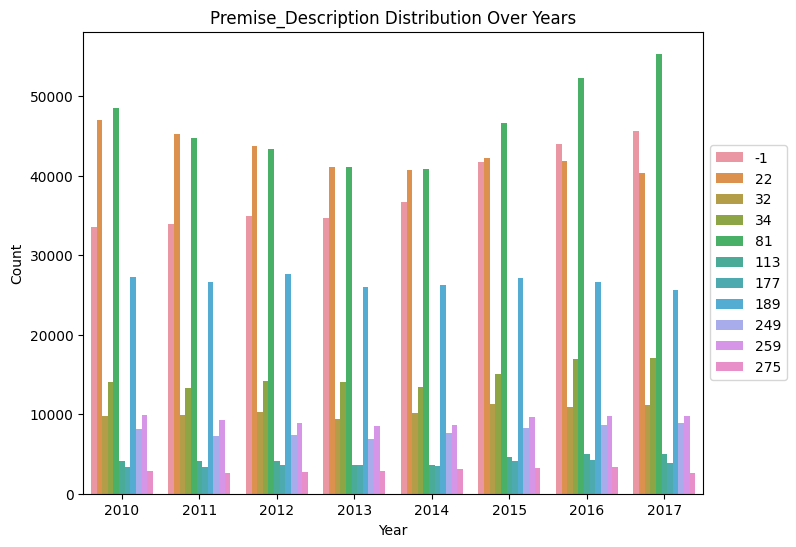

In [23]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Premise_Description', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Premise_Description Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Weapon Description

* Missing values for weapons description are None

In [24]:
crime_list = list(set(big_df['Weapon_Description']))
mapped_weapons = {crime: idx if crime is not None else -1 for idx, crime in enumerate(crime_list)}
mapped_weapons

{'straight razor': 0,
 'bottle': 1,
 'hammer': 2,
 'blackjack': 3,
 'antique firearm': 4,
 'other cutting instrument': 5,
 'switch blade': 6,
 'club/bat': 7,
 'unknown firearm': 8,
 'other firearm': 9,
 'caustic chemical/poison': 10,
 'strong-arm (hands, fist, feet or bodily force)': 11,
 'heckler  koch 91 semiautomatic assault rifle': 12,
 'sword': 13,
 None: -1,
 'shotgun': 15,
 'folding knife': 16,
 'verbal threat': 17,
 'dirk/dagger': 18,
 'unk type semiautomatic assault rifle': 19,
 'toy gun': 20,
 'simulated gun': 21,
 'syringe': 22,
 'stick': 23,
 'semi-automatic rifle': 24,
 'ice pick': 25,
 'vehicle': 26,
 'other knife': 27,
 'revolver': 28,
 'sawed off rifle/shotgun': 29,
 'scissors': 30,
 'board': 31,
 'screwdriver': 32,
 'brass knuckles': 33,
 'physical presence': 34,
 'bowie knife': 35,
 'm-14 semiautomatic assault rifle': 36,
 'mac-10 semiautomatic assault weapon': 37,
 'assault weapon/uzi/ak47/etc': 38,
 'cleaver': 39,
 'hand gun': 40,
 'automatic weapon/sub-machine gun'

In [25]:
# One hot encoding for gender
big_df['Weapon_Description'] = big_df['Weapon_Description'].replace(mapped_weapons).fillna(-1).astype(int)

# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Weapon_Description'] != -1]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Weapon_Description'].median().reset_index(name = 'Median_Weapons')

# Assign the median value / year to the missing values for each year
big_df['Weapon_Description'] = np.where(big_df['Weapon_Description'] == -1,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Weapons']),
                                big_df['Weapon_Description']).astype(int)

print(big_df['Weapon_Description'].value_counts())
big_df.head()

11    1444064
17      45661
55      42885
40      26505
64      10475
       ...   
37          8
4           7
46          5
54          3
36          1
Name: Weapon_Description, Length: 79, dtype: int64


,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,0,1,189,11,Adult Other,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,1,1,81,11,Invest Cont,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,1,1,81,11,Invest Cont,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,1,1,81,11,Invest Cont,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,1,1,22,11,Invest Cont,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014,60+


In [26]:
# Skewness and Outliers - before grouping
print(big_df['Weapon_Description'].skew())
print(big_df['Weapon_Description'].describe())


# Skewness and Outliers - after grouping

res = big_df['Weapon_Description'].value_counts()

# Get top 10 most used
top_10_indices = res.index[:10]

# Create a dictionary mapping indices
result_dict = {index: index for index in top_10_indices}
print(result_dict)
common_value = -1  # value for the remaining indeces
result_dict.update({index: common_value for index in res.index if index not in top_10_indices})


big_df['Weapon_Description'] = [result_dict[x] for x in big_df['Weapon_Description']]
big_df['Weapon_Description'].value_counts()

3.4508249567643947
count    1.659079e+06
mean     1.450042e+01
std      1.170219e+01
min      0.000000e+00
25%      1.100000e+01
50%      1.100000e+01
75%      1.100000e+01
max      7.900000e+01
Name: Weapon_Description, dtype: float64
{11: 11, 17: 17, 55: 55, 40: 40, 64: 64, 53: 53, 27: 27, 8: 8, 26: 26, 28: 28}


 11    1444064
-1       55713
 17      45661
 55      42885
 40      26505
 64      10475
 53       9837
 27       7305
 8        6283
 26       5601
 28       4750
Name: Weapon_Description, dtype: int64

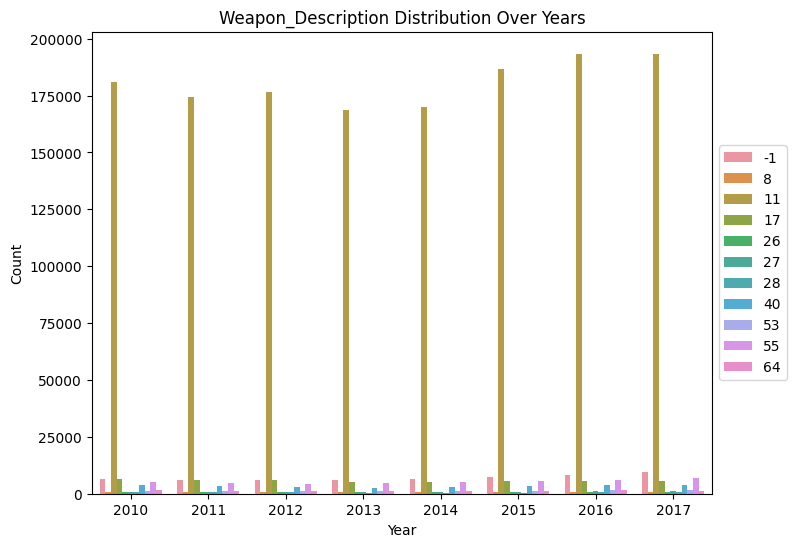

In [27]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Weapon_Description', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Weapon_Description Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### Status - for UNK values

* Missing values for Status are Unknown and None
* Mapping for values of status description:

    * mapped_status = {'Invest Cont': 0, 'Adult Other': 1, 'Adult Arrest': 2, 'Juv Arrest': 3, 'Juv Other': 4, 'UNK': -1, None: -1 }

In [28]:
# One hot encoding for gender
mapped_status = {'Invest Cont': 0, 'Adult Other': 1, 'Adult Arrest': 2, 'Juv Arrest': 3, 'Juv Other': 4, 'UNK': -1, None: -1 }

big_df['Status_Description'] = big_df['Status_Description'].replace(mapped_status).fillna(-1).astype(int)

# Filter out rows with age equal to 0 (aka missing values)
filtered_df = big_df[big_df['Status_Description'] != -1]

# Group by 'Year' and calculate the median of ages / year
median_ages_by_year = filtered_df.groupby('Year')['Status_Description'].median().reset_index(name = 'Median_Status')

# Assign the median value / year to the missing values for each year
big_df['Status_Description'] = np.where(big_df['Status_Description'] == -1,
                                big_df['Year'].map(median_ages_by_year.set_index('Year')['Median_Status']),
                                big_df['Status_Description']).astype(int)

big_df['Status_Description'].value_counts()
big_df.head()

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Location_,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,0,1,189,11,1,"(33.9829, -118.3338)",2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,1,1,81,11,0,"(34.0454, -118.3157)",2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,1,1,81,11,0,"(33.942, -118.2717)",2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,1,1,81,11,0,"(33.9572, -118.2717)",2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,1,1,22,11,0,"(34.2009, -118.6369)",2014-01-11,2014-01-04,2014,60+


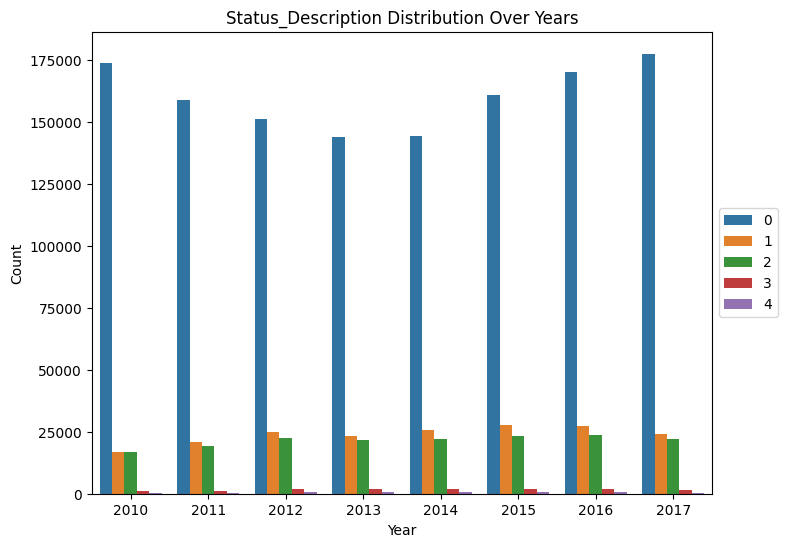

In [29]:
# Create a bar plot for gender depending on the year
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = 'Year', hue = 'Status_Description', data = big_df)

# Move the legend to the right
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.title('Status_Description Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Data Exploration after preprocessing

In [30]:
# Dropping Location column - a lot of unknown values that are hard to map - 6698 values
big_df = big_df.drop(['Location_'], axis = 1)

In [31]:
print(big_df.shape)
print()
print(big_df.info())
big_df.head(10)

(1659079, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659079 entries, 0 to 1691579
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Time_Occurred           1659079 non-null  int64         
 1   Area_Name               1659079 non-null  object        
 2   Reporting_District      1659079 non-null  int64         
 3   Crime_Code_Description  1659079 non-null  int64         
 4   Victim_Sex              1659079 non-null  int64         
 5   Victim_Descent          1659079 non-null  int64         
 6   Premise_Description     1659079 non-null  int64         
 7   Weapon_Description      1659079 non-null  int64         
 8   Status_Description      1659079 non-null  int64         
 9   Date_Reported_format    1659079 non-null  datetime64[ns]
 10  Date_Occurred_format    1659079 non-null  datetime64[ns]
 11  Year                    1659079 non-null  int64         
 12 

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,77th Street,1241,88,0,1,189,11,1,2013-03-14,2013-03-11,2013,25-39
1,2300,Olympic,2071,42,1,1,81,11,0,2010-01-25,2010-01-22,2010,25-39
2,2030,Southeast,1823,42,1,1,81,11,0,2013-03-19,2013-03-18,2013,0-17
3,1800,Southeast,1803,42,1,1,81,11,0,2010-11-11,2010-11-10,2010,25-39
4,2300,Topanga,2133,61,1,1,22,11,0,2014-01-11,2014-01-04,2014,60+
5,1400,Central,111,-1,0,1,22,11,2,2013-01-08,2013-01-08,2013,40-59
6,2230,Northeast,1125,42,1,1,34,11,0,2010-01-28,2010-01-27,2010,25-39
7,1600,Foothill,1641,42,1,1,81,11,0,2010-11-11,2010-11-07,2010,25-39
8,1600,Mission,1902,42,1,1,81,11,0,2010-04-07,2010-04-07,2010,25-39
9,800,Van Nuys,904,-1,0,3,259,11,0,2013-03-29,2013-01-15,2013,25-39


In [32]:
# Mapping Area_Name column
crime_list = list(set(big_df['Area_Name']))
mapped_areas = {crime: idx if crime is not None else -1 for idx, crime in enumerate(crime_list)}
print(mapped_areas)

big_df['Area_Name'] = big_df['Area_Name'].replace(mapped_areas)

{'Topanga': 0, 'Rampart': 1, 'Devonshire': 2, 'Southwest': 3, 'Hollywood': 4, 'Northeast': 5, 'Hollenbeck': 6, 'Pacific': 7, 'Olympic': 8, 'Newton': 9, 'Foothill': 10, 'Mission': 11, 'N Hollywood': 12, 'Harbor': 13, '77th Street': 14, 'West LA': 15, 'Southeast': 16, 'Van Nuys': 17, 'Central': 18, 'West Valley': 19, 'Wilshire': 20}


In [33]:
# Creating a dataframe with only numeric values
numeric_df = big_df.copy()

mapped_age_buckets = {'0-17': 0, '18-24': 1, '25-39': 2, '40-59': 3, '60+': 4}

numeric_df['Victim_Age_Buckets'] = numeric_df['Victim_Age_Buckets'].replace(mapped_age_buckets).astype(int)

print(numeric_df.shape)
print()
print(numeric_df.info())
numeric_df.head()

(1659079, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659079 entries, 0 to 1691579
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Time_Occurred           1659079 non-null  int64         
 1   Area_Name               1659079 non-null  int64         
 2   Reporting_District      1659079 non-null  int64         
 3   Crime_Code_Description  1659079 non-null  int64         
 4   Victim_Sex              1659079 non-null  int64         
 5   Victim_Descent          1659079 non-null  int64         
 6   Premise_Description     1659079 non-null  int64         
 7   Weapon_Description      1659079 non-null  int64         
 8   Status_Description      1659079 non-null  int64         
 9   Date_Reported_format    1659079 non-null  datetime64[ns]
 10  Date_Occurred_format    1659079 non-null  datetime64[ns]
 11  Year                    1659079 non-null  int64         
 12 

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Date_Reported_format,Date_Occurred_format,Year,Victim_Age_Buckets
0,1800,14,1241,88,0,1,189,11,1,2013-03-14,2013-03-11,2013,2
1,2300,8,2071,42,1,1,81,11,0,2010-01-25,2010-01-22,2010,2
2,2030,16,1823,42,1,1,81,11,0,2013-03-19,2013-03-18,2013,0
3,1800,16,1803,42,1,1,81,11,0,2010-11-11,2010-11-10,2010,2
4,2300,0,2133,61,1,1,22,11,0,2014-01-11,2014-01-04,2014,4


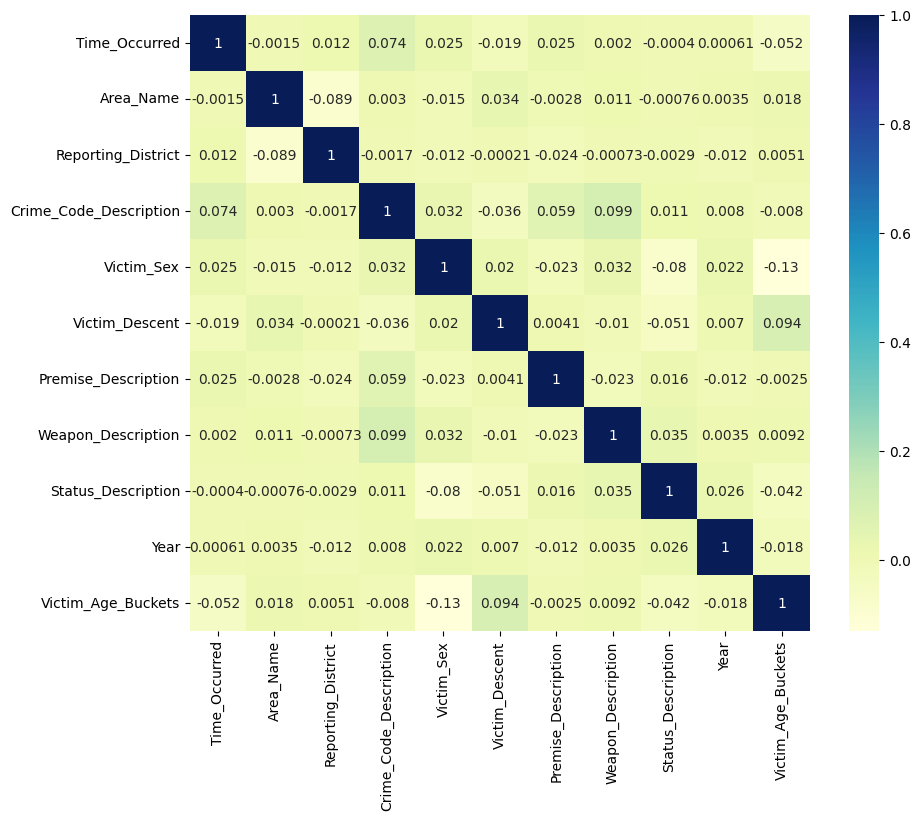

In [34]:
# Correlation Heatmap
plt.figure(figsize = (10, 8))
dataplot = sns.heatmap(numeric_df.corr(numeric_only = True), cmap = "YlGnBu", annot = True)
plt.show()

In [35]:
# Dropping columns that are not important according to the heatmap

columns_to_drop = ['Year', 'Date_Reported_format', 'Date_Occurred_format']
numeric_df = numeric_df.drop(columns = columns_to_drop)
numeric_df.head()

,Time_Occurred,Area_Name,Reporting_District,Crime_Code_Description,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status_Description,Victim_Age_Buckets
0,1800,14,1241,88,0,1,189,11,1,2
1,2300,8,2071,42,1,1,81,11,0,2
2,2030,16,1823,42,1,1,81,11,0,0
3,1800,16,1803,42,1,1,81,11,0,2
4,2300,0,2133,61,1,1,22,11,0,4


In [36]:
# Pairplot for every variable - TAKES A LONG TIME - IMAGE CAN BE SEEN BELOW
# sns.pairplot(numeric_df, vars = numeric_df.columns, height = 2.7)

# Train - Test Splits

# Classifiers

## KNN

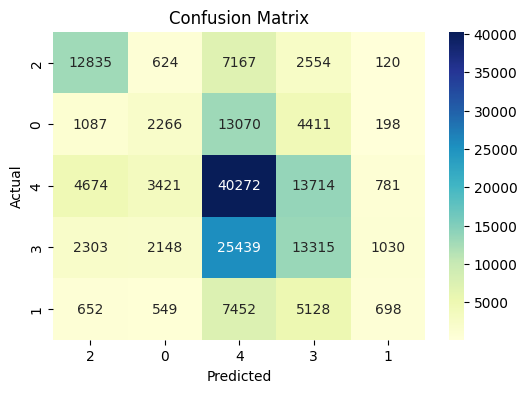


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 15
Accuracy: 41.82 %
              precision    recall  f1-score   support

           0       0.60      0.55      0.57     23300
           1       0.25      0.11      0.15     21032
           2       0.43      0.64      0.52     62862
           3       0.34      0.30      0.32     44235
           4       0.25      0.05      0.08     14479

    accuracy                           0.42    165908
   macro avg       0.37      0.33      0.33    165908
weighted avg       0.39      0.42      0.39    165908



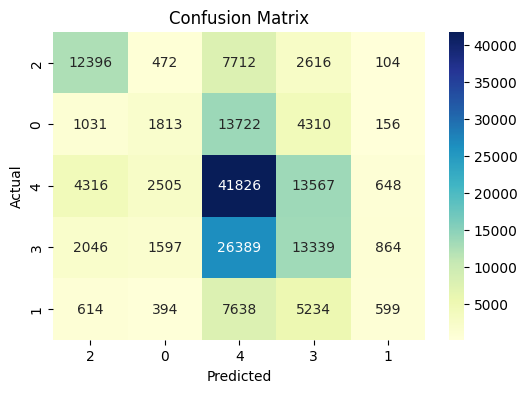


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 20
Accuracy: 42.18 %
              precision    recall  f1-score   support

           0       0.61      0.53      0.57     23300
           1       0.27      0.09      0.13     21032
           2       0.43      0.67      0.52     62862
           3       0.34      0.30      0.32     44235
           4       0.25      0.04      0.07     14479

    accuracy                           0.42    165908
   macro avg       0.38      0.33      0.32    165908
weighted avg       0.40      0.42      0.39    165908



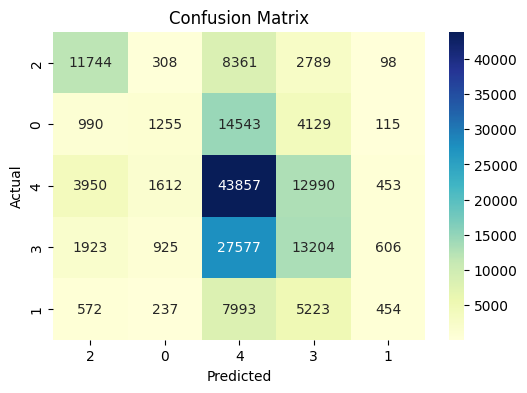


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 30
Accuracy: 42.5 %
              precision    recall  f1-score   support

           0       0.61      0.50      0.55     23300
           1       0.29      0.06      0.10     21032
           2       0.43      0.70      0.53     62862
           3       0.34      0.30      0.32     44235
           4       0.26      0.03      0.06     14479

    accuracy                           0.43    165908
   macro avg       0.39      0.32      0.31    165908
weighted avg       0.40      0.43      0.38    165908



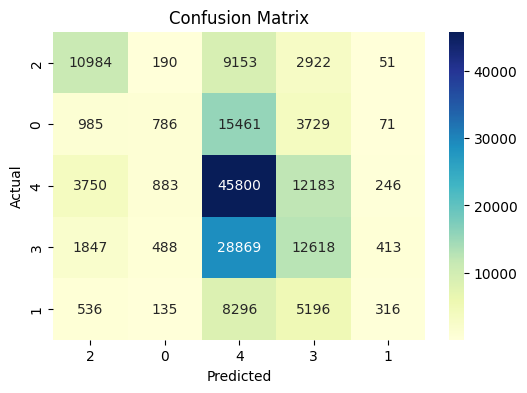


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 50
Accuracy: 42.5 %
              precision    recall  f1-score   support

           0       0.61      0.47      0.53     23300
           1       0.32      0.04      0.07     21032
           2       0.43      0.73      0.54     62862
           3       0.34      0.29      0.31     44235
           4       0.29      0.02      0.04     14479

    accuracy                           0.42    165908
   macro avg       0.40      0.31      0.30    165908
weighted avg       0.40      0.42      0.37    165908



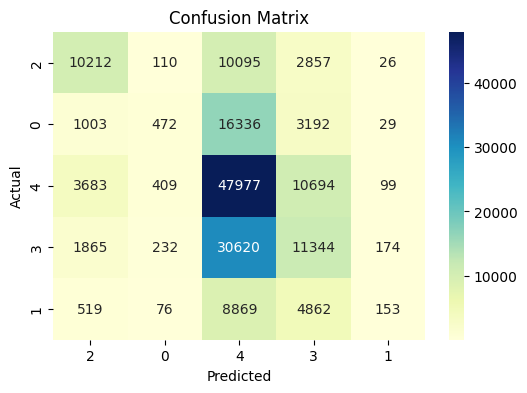


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 100
Accuracy: 42.29 %
              precision    recall  f1-score   support

           0       0.59      0.44      0.50     23300
           1       0.36      0.02      0.04     21032
           2       0.42      0.76      0.54     62862
           3       0.34      0.26      0.29     44235
           4       0.32      0.01      0.02     14479

    accuracy                           0.42    165908
   macro avg       0.41      0.30      0.28    165908
weighted avg       0.41      0.42      0.36    165908



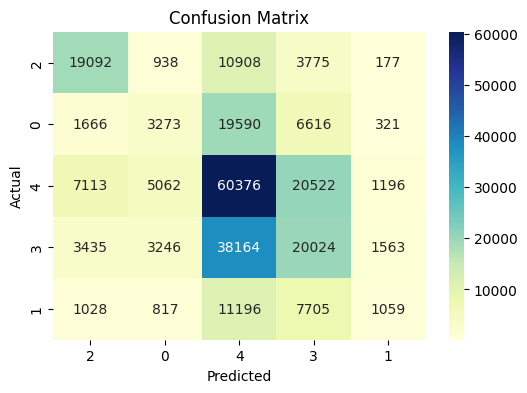


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 15
Accuracy: 41.72 %
              precision    recall  f1-score   support

           0       0.59      0.55      0.57     34890
           1       0.25      0.10      0.15     31466
           2       0.43      0.64      0.51     94269
           3       0.34      0.30      0.32     66432
           4       0.25      0.05      0.08     21805

    accuracy                           0.42    248862
   macro avg       0.37      0.33      0.33    248862
weighted avg       0.39      0.42      0.39    248862



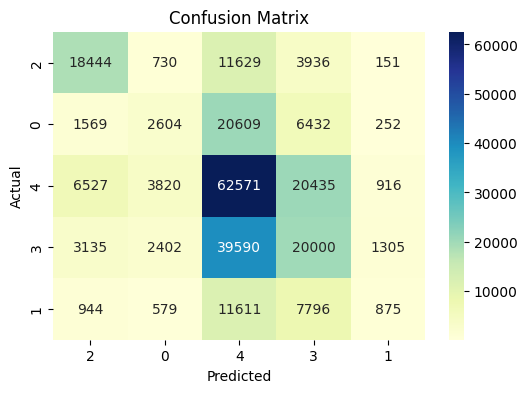


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 20
Accuracy: 41.99 %
              precision    recall  f1-score   support

           0       0.60      0.53      0.56     34890
           1       0.26      0.08      0.13     31466
           2       0.43      0.66      0.52     94269
           3       0.34      0.30      0.32     66432
           4       0.25      0.04      0.07     21805

    accuracy                           0.42    248862
   macro avg       0.38      0.32      0.32    248862
weighted avg       0.39      0.42      0.38    248862



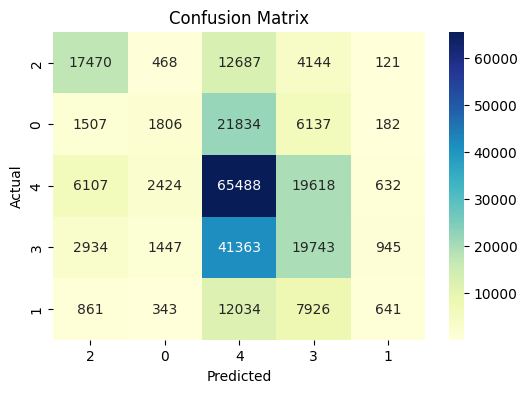


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 30
Accuracy: 42.25 %
              precision    recall  f1-score   support

           0       0.60      0.50      0.55     34890
           1       0.28      0.06      0.10     31466
           2       0.43      0.69      0.53     94269
           3       0.34      0.30      0.32     66432
           4       0.25      0.03      0.05     21805

    accuracy                           0.42    248862
   macro avg       0.38      0.32      0.31    248862
weighted avg       0.40      0.42      0.38    248862



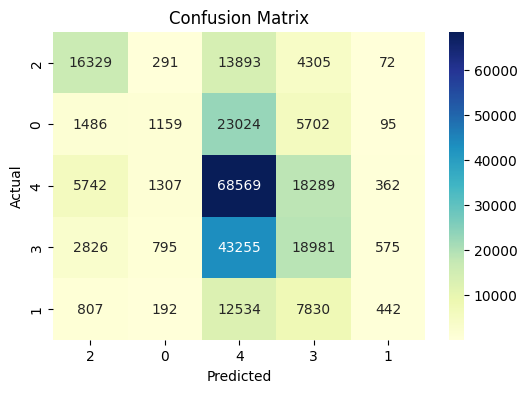


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 50
Accuracy: 42.38 %
              precision    recall  f1-score   support

           0       0.60      0.47      0.53     34890
           1       0.31      0.04      0.07     31466
           2       0.43      0.73      0.54     94269
           3       0.34      0.29      0.31     66432
           4       0.29      0.02      0.04     21805

    accuracy                           0.42    248862
   macro avg       0.39      0.31      0.30    248862
weighted avg       0.40      0.42      0.37    248862



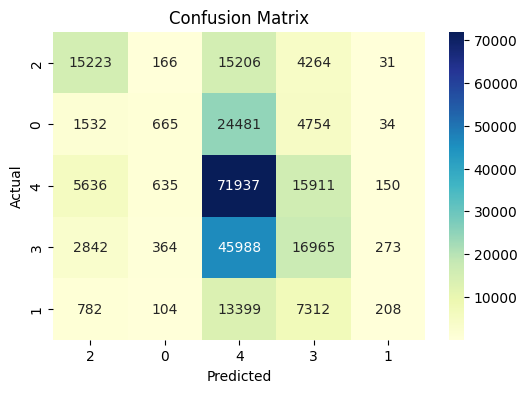


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 100
Accuracy: 42.19 %
              precision    recall  f1-score   support

           0       0.59      0.44      0.50     34890
           1       0.34      0.02      0.04     31466
           2       0.42      0.76      0.54     94269
           3       0.34      0.26      0.29     66432
           4       0.30      0.01      0.02     21805

    accuracy                           0.42    248862
   macro avg       0.40      0.30      0.28    248862
weighted avg       0.40      0.42      0.36    248862



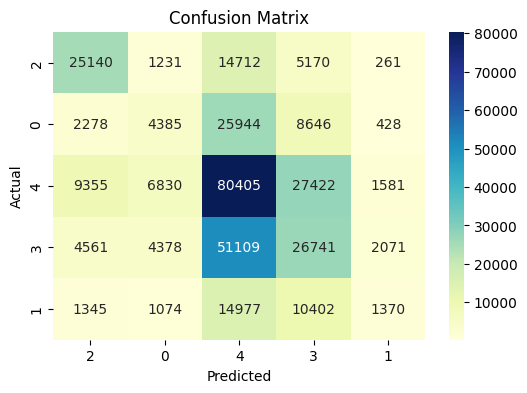


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 15
Accuracy: 41.6 %
              precision    recall  f1-score   support

           0       0.59      0.54      0.56     46514
           1       0.24      0.11      0.15     41681
           2       0.43      0.64      0.51    125593
           3       0.34      0.30      0.32     88860
           4       0.24      0.05      0.08     29168

    accuracy                           0.42    331816
   macro avg       0.37      0.33      0.32    331816
weighted avg       0.39      0.42      0.38    331816



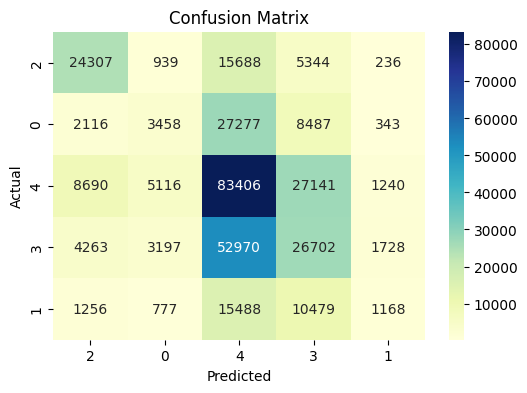


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 20
Accuracy: 41.9 %
              precision    recall  f1-score   support

           0       0.60      0.52      0.56     46514
           1       0.26      0.08      0.13     41681
           2       0.43      0.66      0.52    125593
           3       0.34      0.30      0.32     88860
           4       0.25      0.04      0.07     29168

    accuracy                           0.42    331816
   macro avg       0.37      0.32      0.32    331816
weighted avg       0.39      0.42      0.38    331816



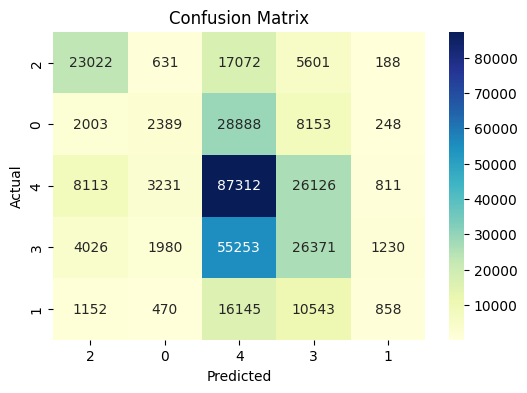


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 30
Accuracy: 42.18 %
              precision    recall  f1-score   support

           0       0.60      0.49      0.54     46514
           1       0.27      0.06      0.09     41681
           2       0.43      0.70      0.53    125593
           3       0.34      0.30      0.32     88860
           4       0.26      0.03      0.05     29168

    accuracy                           0.42    331816
   macro avg       0.38      0.31      0.31    331816
weighted avg       0.39      0.42      0.38    331816



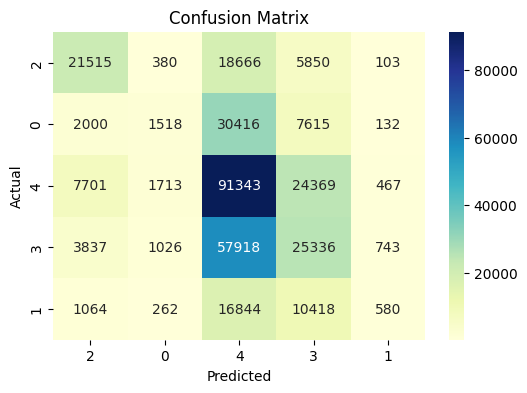


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 50
Accuracy: 42.28 %
              precision    recall  f1-score   support

           0       0.60      0.46      0.52     46514
           1       0.31      0.04      0.07     41681
           2       0.42      0.73      0.54    125593
           3       0.34      0.29      0.31     88860
           4       0.29      0.02      0.04     29168

    accuracy                           0.42    331816
   macro avg       0.39      0.31      0.29    331816
weighted avg       0.40      0.42      0.37    331816



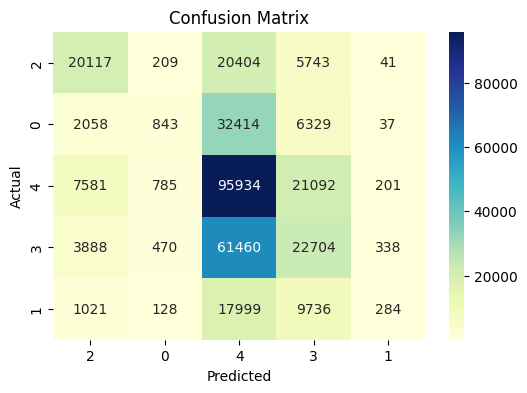


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 100
Accuracy: 42.16 %
              precision    recall  f1-score   support

           0       0.58      0.43      0.50     46514
           1       0.35      0.02      0.04     41681
           2       0.42      0.76      0.54    125593
           3       0.35      0.26      0.29     88860
           4       0.32      0.01      0.02     29168

    accuracy                           0.42    331816
   macro avg       0.40      0.30      0.28    331816
weighted avg       0.40      0.42      0.36    331816



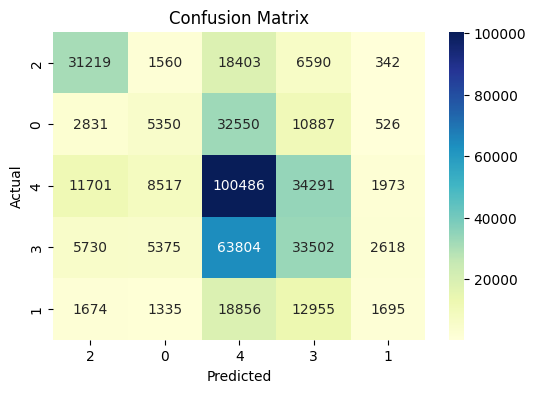


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 15
Accuracy: 41.53 %
              precision    recall  f1-score   support

           0       0.59      0.54      0.56     58114
           1       0.24      0.10      0.14     52144
           2       0.43      0.64      0.51    156968
           3       0.34      0.30      0.32    111029
           4       0.24      0.05      0.08     36515

    accuracy                           0.42    414770
   macro avg       0.37      0.33      0.32    414770
weighted avg       0.39      0.42      0.38    414770



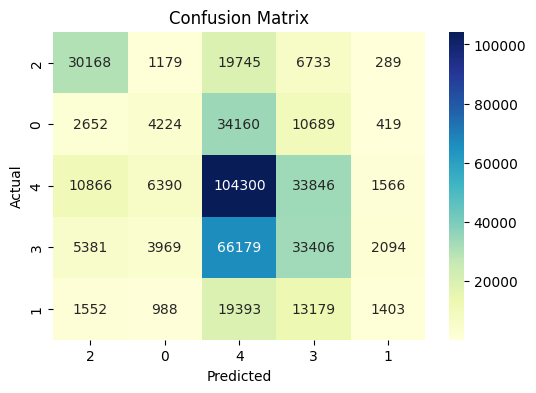


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 20
Accuracy: 41.83 %
              precision    recall  f1-score   support

           0       0.60      0.52      0.55     58114
           1       0.25      0.08      0.12     52144
           2       0.43      0.66      0.52    156968
           3       0.34      0.30      0.32    111029
           4       0.24      0.04      0.07     36515

    accuracy                           0.42    414770
   macro avg       0.37      0.32      0.32    414770
weighted avg       0.39      0.42      0.38    414770



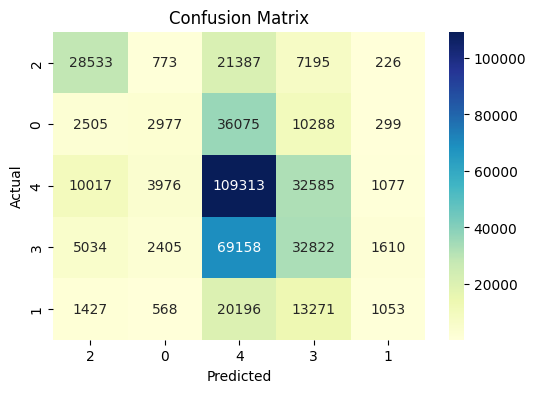


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 30
Accuracy: 42.12 %
              precision    recall  f1-score   support

           0       0.60      0.49      0.54     58114
           1       0.28      0.06      0.09     52144
           2       0.43      0.70      0.53    156968
           3       0.34      0.30      0.32    111029
           4       0.25      0.03      0.05     36515

    accuracy                           0.42    414770
   macro avg       0.38      0.31      0.31    414770
weighted avg       0.39      0.42      0.38    414770



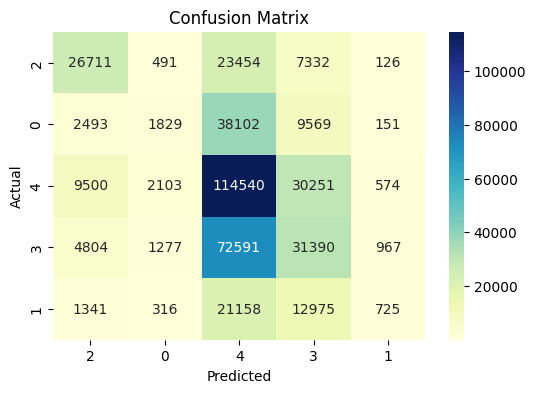


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 50
Accuracy: 42.24 %
              precision    recall  f1-score   support

           0       0.60      0.46      0.52     58114
           1       0.30      0.04      0.06     52144
           2       0.42      0.73      0.54    156968
           3       0.34      0.28      0.31    111029
           4       0.29      0.02      0.04     36515

    accuracy                           0.42    414770
   macro avg       0.39      0.31      0.29    414770
weighted avg       0.40      0.42      0.37    414770



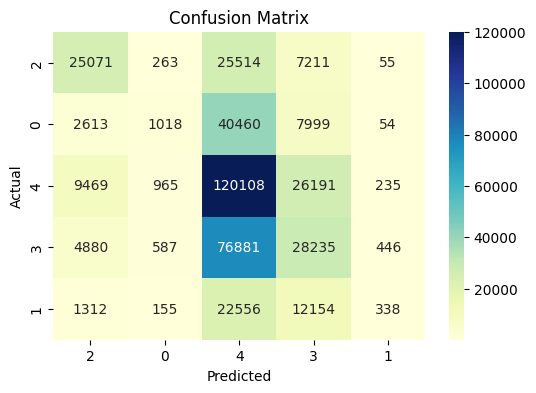


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 100
Accuracy: 42.14 %
              precision    recall  f1-score   support

           0       0.58      0.43      0.49     58114
           1       0.34      0.02      0.04     52144
           2       0.42      0.77      0.54    156968
           3       0.35      0.25      0.29    111029
           4       0.30      0.01      0.02     36515

    accuracy                           0.42    414770
   macro avg       0.40      0.30      0.28    414770
weighted avg       0.40      0.42      0.36    414770


Best Results:
{'test_size': 0.1, 'neighbors': 15, 'accuracy': 0.4182197362393616, 'precision': 0.39119358660086345, 'recall': 0.4182197362393616, 'f1_score': 0.3870211901704415}


In [37]:
## age = value to be predicted = y
## the rest of the dataset = X

df_copy = numeric_df.copy()

y = df_copy['Victim_Age_Buckets']
X = df_copy.drop(['Victim_Age_Buckets'], axis = 1)

test_size = [0.1, 0.15, 0.2, 0.25]
neighbours = [15, 20, 30, 50, 100] # de pus mai mult de 20

best_results = {
                'test_size': None,
                'neighbors': None,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0
                }


for s in test_size:
    for n in neighbours:


        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state = 17)

        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors = n)

        # Fit the classifier on the training data
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict = True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = s
            best_results['neighbors'] = n
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']

        # Print Confusion Matrix
        plt.figure(figsize = (6, 4))
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels = y.unique(), yticklabels = y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nKNN Classifier Performance:")
        print(f"Test Size = {s} and Neighbours = {n}")
        print(f"Accuracy: {round(100 *(accuracy), 2)} %")
        print(classification_report(y_test, y_pred))

# Print the best results
print("\nBest Results:")
print(best_results)

## Random Forest

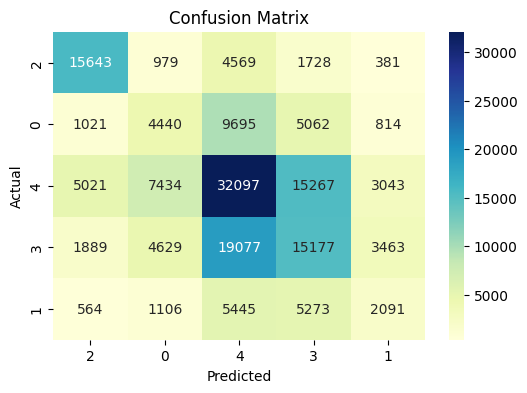


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 10
Accuracy: 41.86 %
              precision    recall  f1-score   support

           0       0.65      0.67      0.66     23300
           1       0.24      0.21      0.22     21032
           2       0.45      0.51      0.48     62862
           3       0.36      0.34      0.35     44235
           4       0.21      0.14      0.17     14479

    accuracy                           0.42    165908
   macro avg       0.38      0.38      0.38    165908
weighted avg       0.41      0.42      0.41    165908



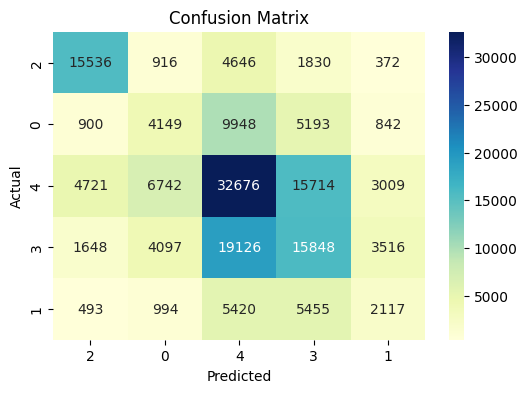


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 20
Accuracy: 42.39 %
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     23300
           1       0.25      0.20      0.22     21032
           2       0.45      0.52      0.49     62862
           3       0.36      0.36      0.36     44235
           4       0.21      0.15      0.17     14479

    accuracy                           0.42    165908
   macro avg       0.39      0.38      0.38    165908
weighted avg       0.41      0.42      0.42    165908



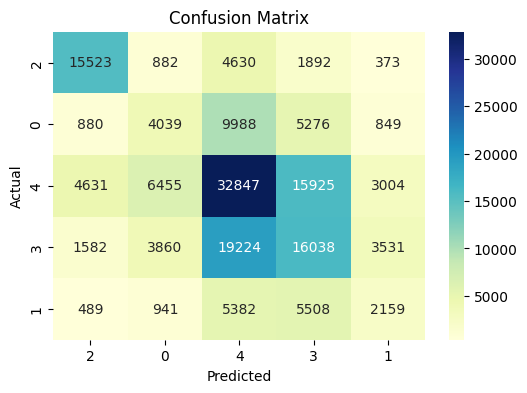


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 30
Accuracy: 42.56 %
              precision    recall  f1-score   support

           0       0.67      0.67      0.67     23300
           1       0.25      0.19      0.22     21032
           2       0.46      0.52      0.49     62862
           3       0.36      0.36      0.36     44235
           4       0.22      0.15      0.18     14479

    accuracy                           0.43    165908
   macro avg       0.39      0.38      0.38    165908
weighted avg       0.41      0.43      0.42    165908



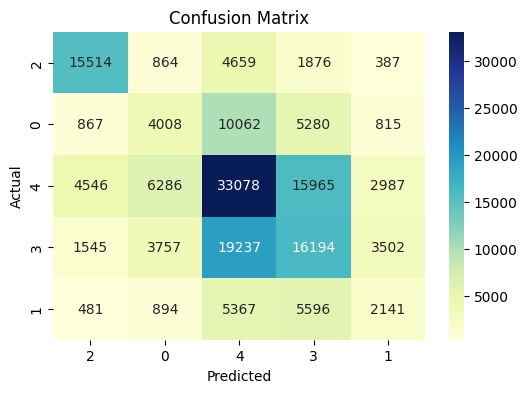


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 50
Accuracy: 42.76 %
              precision    recall  f1-score   support

           0       0.68      0.67      0.67     23300
           1       0.25      0.19      0.22     21032
           2       0.46      0.53      0.49     62862
           3       0.36      0.37      0.36     44235
           4       0.22      0.15      0.18     14479

    accuracy                           0.43    165908
   macro avg       0.39      0.38      0.38    165908
weighted avg       0.42      0.43      0.42    165908



In [ ]:
## age = value to be predicted = y
## the rest of the dataset = X

# df_copy = numeric_df.copy()

y = df_copy['Victim_Age_Buckets']
X = df_copy.drop(['Victim_Age_Buckets'], axis = 1)

test_sizes = [0.1, 0.15, 0.2, 0.25]
estimators = [10, 20, 30, 50, 100] # s a oprit dupa 50

best_results = {
    'test_size': None,
    'estimators': None,
    'accuracy': 0,
    'precision': 0,
    'recall': 0,
    'f1_score': 0
}

for test_size in test_sizes:
    for num_estimators in estimators:
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)

        # Initialize the Random Forest classifier
        rf_classifier = RandomForestClassifier(n_estimators=num_estimators, random_state=17)

        # Fit the classifier on the training data
        rf_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = test_size
            best_results['estimators'] = num_estimators
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']

        # Print Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=y.unique(), yticklabels=y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nRandom Forest Classifier Performance:")
        print(f"Test Size = {test_size} and Estimators = {num_estimators}")
        print(f"Accuracy: {round(100 * accuracy, 2)} %")
        print(classification_report(y_test, y_pred))

# Print the best results
print("\nBest Results:")
print(best_results)

## MLP

In [ ]:
## age = value to be predicted = y
## the rest of the dataset = X

# df_copy = numeric_df.copy()

y = df_copy['Victim_Age_Buckets']
X = df_copy.drop(['Victim_Age_Buckets'], axis = 1)

test_size = [0.1, 0.15, 0.2, 0.25]
layers = [10, 20, 30, 50, 100]

best_results = {
                'test_size': None,
                'layers': None,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0
                }


for s in test_size:
    for l in layers:

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state = 17)

        # Initialize the MLP classifier
        mlp_classifier = MLPClassifier(hidden_layer_sizes = (l, ), max_iter = 1000, random_state = 17)

        # Fit the classifier on the training data
        mlp_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = mlp_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict = True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = s
            best_results['layers'] = n
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']


        # Print Confusion Matrix
        plt.figure(figsize = (6, 4))
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels = y.unique(), yticklabels = y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nMLP Classifier Performance:")
        print(f"Test Size = {s} and Estimators = {e}")
        print(f"Accuracy: {round(100 *(accuracy), 2)} %")
        print(classification_report(y_test, y_pred))

# Print the best results
print("\nBest Results:")
print(best_results)